In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px

In [30]:
df = pd.read_csv("countries.csv", index_col=False)

## Basic info

In [415]:
df.head()

,Country,Purchasing Power,Purchasing Power Category,Safety,Safety Category,Health Care,Health Care Category,Climate,Climate Category,Cost of Living,Cost of Living Category,Property Price to Income,Property Price to Income Category,Traffic Commute Time,Traffic Commute Time Category,Pollution,Pollution Category,Quality of Life,Quality of Life Category
0,Albania,42.82,Low,55.52,Moderate,48.21,Moderate,86.43,Very High,40.85,Low,14.88,High,36.74,Moderate,77.25,High,104.16,Low
1,Algeria,27.60,Very Low,47.54,Moderate,54.43,Moderate,94.82,Very High,25.31,Very Low,21.70,Very High,45.09,High,63.87,High,98.83,Very Low
2,Argentina,40.36,Low,36.36,Low,68.00,High,98.28,Very High,32.65,Very Low,20.05,Very High,44.07,High,50.81,Moderate,115.06,Low
3,Armenia,36.91,Very Low,77.81,High,58.07,Moderate,63.42,High,41.84,Low,20.95,Very High,29.31,Low,62.55,High,116.56,Low
4,Australia,137.58,Very High,52.71,Moderate,73.35,High,93.80,Very High,64.50,Moderate,8.25,Moderate,37.48,Moderate,26.80,Low,190.69,Very High


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            114 non-null    object 
 1   Purchasing Power                   114 non-null    float64
 2   Purchasing Power Category          114 non-null    object 
 3   Safety                             114 non-null    float64
 4   Safety Category                    114 non-null    object 
 5   Health Care                        114 non-null    float64
 6   Health Care Category               114 non-null    object 
 7   Climate                            114 non-null    float64
 8   Climate Category                   114 non-null    object 
 9   Cost of Living                     114 non-null    float64
 10  Cost of Living Category            114 non-null    object 
 11  Property Price to Income           114 non-null    float64

In [410]:
df.describe()

,Purchasing Power,Safety,Health Care,Climate,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Quality of Life
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,72.673421,57.905789,62.604298,77.896930,41.411053,14.181754,35.434649,56.154649,133.518251
std,42.417819,13.601773,10.202121,17.358836,15.366051,6.764495,9.407027,19.970989,42.440721
min,10.330000,25.360000,41.050000,3.540000,17.900000,2.810000,15.670000,11.830000,17.470000
25%,40.285000,48.192500,55.245000,67.977500,29.930000,9.145000,28.662500,40.950000,105.507500
50%,57.920000,57.005000,62.110000,80.600000,37.925000,12.905000,35.175000,60.465000,129.720000
75%,107.965000,68.230000,71.072500,91.692500,49.422500,17.235000,40.375000,72.177500,164.945000
max,195.550000,84.430000,86.500000,99.890000,101.180000,29.360000,65.310000,89.410000,224.310000


The dataset has 114 entries and 19 columns, where "Country" is unique and the remaining 18 columns seem to be pairwise dependent, meaning that each quantitative column has its corresponding categorical counterpart. We have also seen some descriptive statistics for numerical columns, namely mean, standard deviations, minimal and maximal values, as well as 25th, 50th, and 75th percentiles.

### Histograms

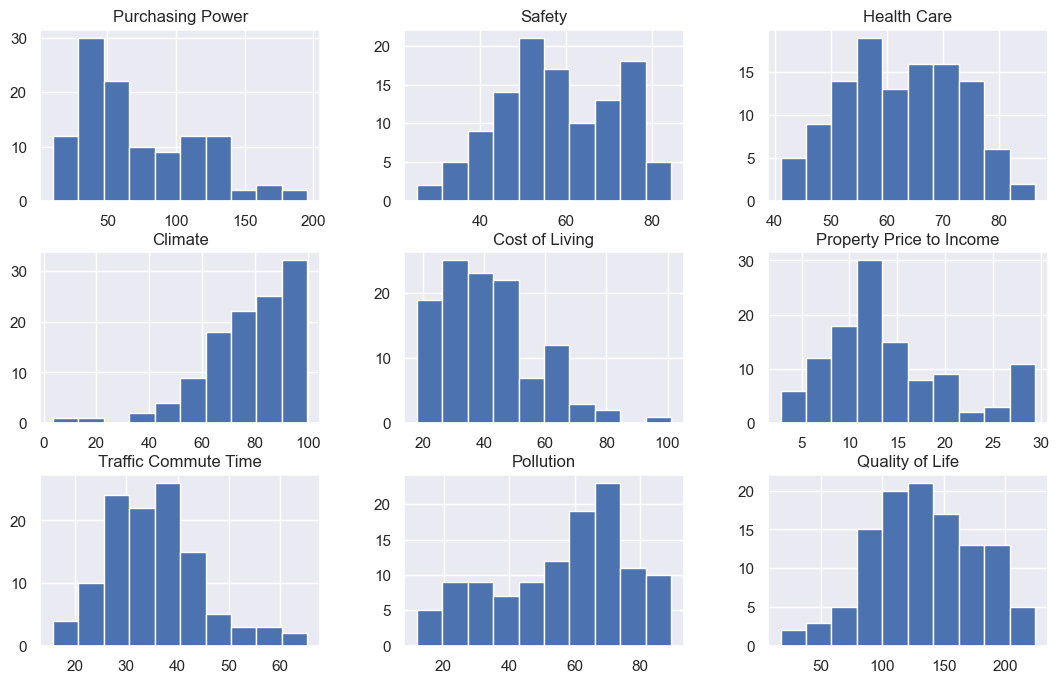

In [423]:
df.hist();

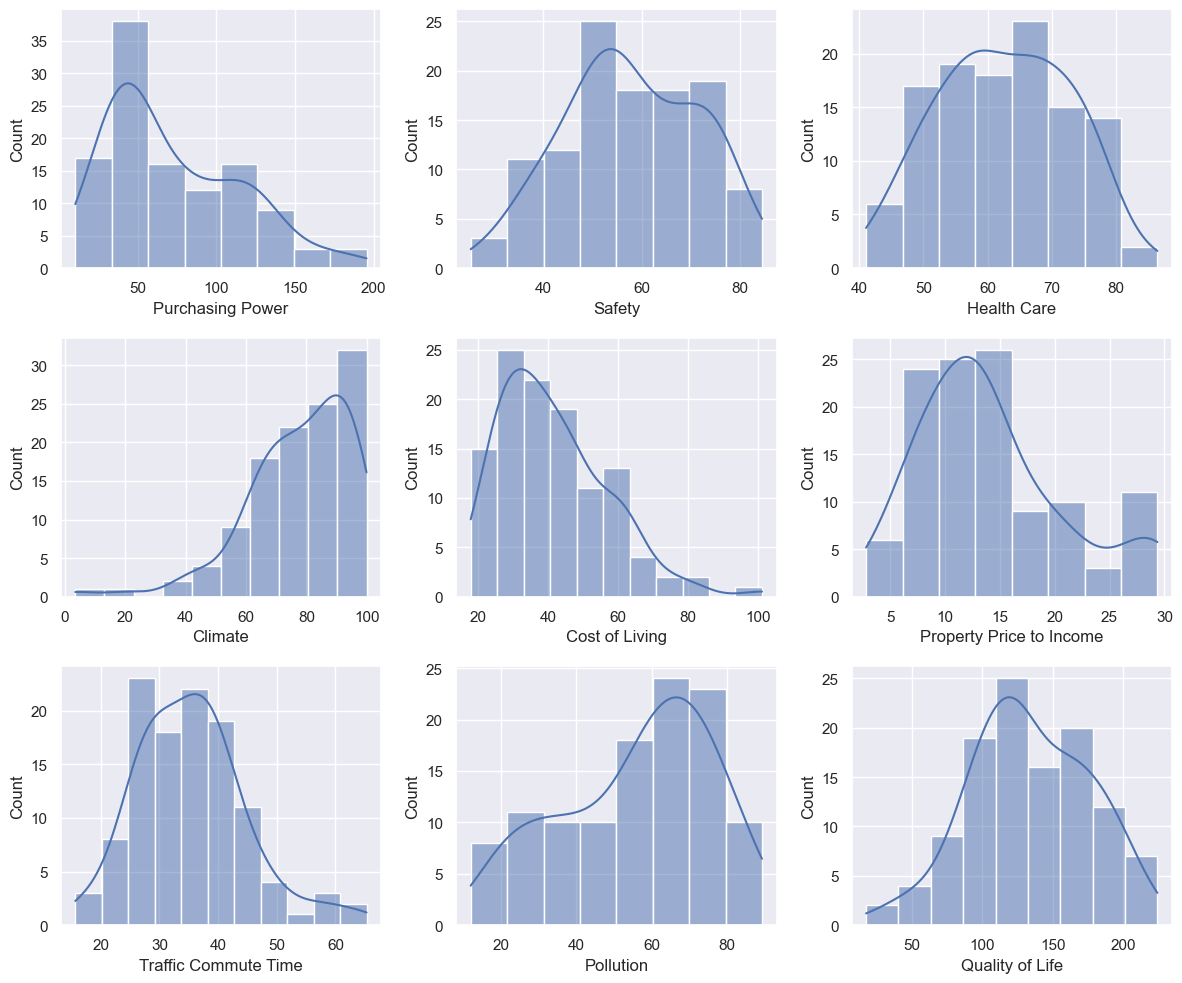

,Skewness,Kurtosis
Column,,
Purchasing Power,0.78,-0.17
Safety,-0.07,-0.73
Health Care,-0.03,-0.78
Climate,-1.31,2.72
Cost of Living,0.99,1.19
Property Price to Income,0.79,-0.01
Traffic Commute Time,0.68,0.92
Pollution,-0.45,-0.80
Quality of Life,-0.12,-0.32


In [671]:
fig, axes = plt.subplots(3,3, figsize=(12, 10))
#sns.histplot(data=df, x='Quality of Life', kde=True, ax=axes[0])
#sns.histplot(data=df, x='Pollution', kde=True, ax=axes[1])
#sns.histplot(data=df, x='Safety', kde=True, ax=axes[2]);

for i, col in enumerate(df.select_dtypes(include='number').columns):
    if i < 3:
        n = 0  # Row index
    elif i < 6: 
        n = 1
    else:
        n = 2
    m = i % 3  # Column index within the row
    
    sns.histplot(data=df, x=col, kde=True, ax=axes[n, m])  # Fixing the ax assignment

plt.tight_layout()
plt.show()

dist_shapes = []
for col in df.select_dtypes(include='number').columns:
    dist_shapes.append({
        "Column": col,
        "Skewness": round(df[col].skew(), 2),
        "Kurtosis": round(df[col].kurt(), 2)
    })
pd.DataFrame(dist_shapes).set_index("Column")

## Violin plots

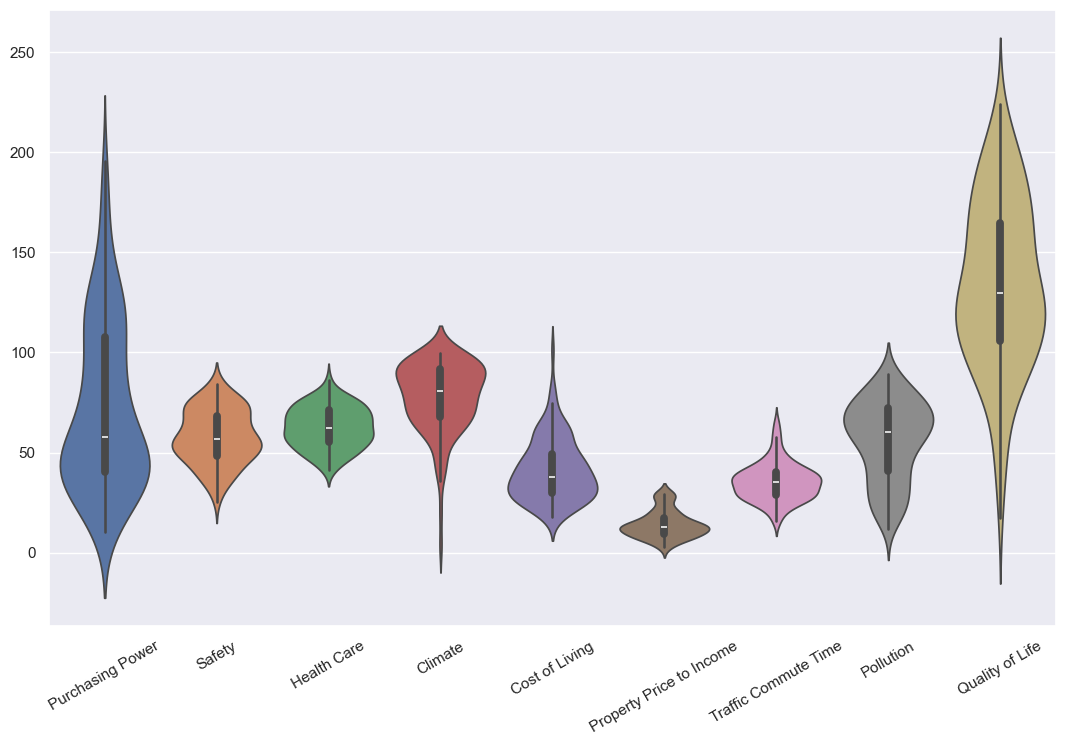

In [235]:
sns.set(rc={"figure.figsize": (13, 8)});
sns.violinplot(df).tick_params(axis='x', labelrotation=30)


### Median metric values per Quality of Life Category

In [425]:
# See what are the median metrics for each category of life quality

custom_order = ["Very High", "High", "Moderate", "Low", "Very Low"] 
df["Quality of Life Category"] = pd.Categorical(df["Quality of Life Category"], categories=custom_order, ordered=True)

life_qual_sorted = df.groupby("Quality of Life Category", observed=True)[df.select_dtypes(include='number').columns].median()
display(life_qual_sorted)

,Purchasing Power,Safety,Health Care,Climate,Cost of Living,Property Price to Income,Traffic Commute Time,Pollution,Quality of Life
Quality of Life Category,,,,,,,,,
Very High,122.300,68.250,73.34,79.240,59.360,8.480,29.01,29.800,184.670
High,106.510,69.200,58.60,80.720,48.790,11.030,31.79,55.510,155.840
Moderate,57.770,57.320,60.66,82.760,34.660,12.000,35.68,59.680,130.090
Low,42.130,54.620,59.38,86.430,28.080,14.880,38.01,70.080,109.450
Very Low,30.815,47.535,54.26,71.285,30.585,20.945,40.99,75.305,85.415


## Scatter plot with trend line
The mentioned general trends can be seen on the scatter plots with trend lines

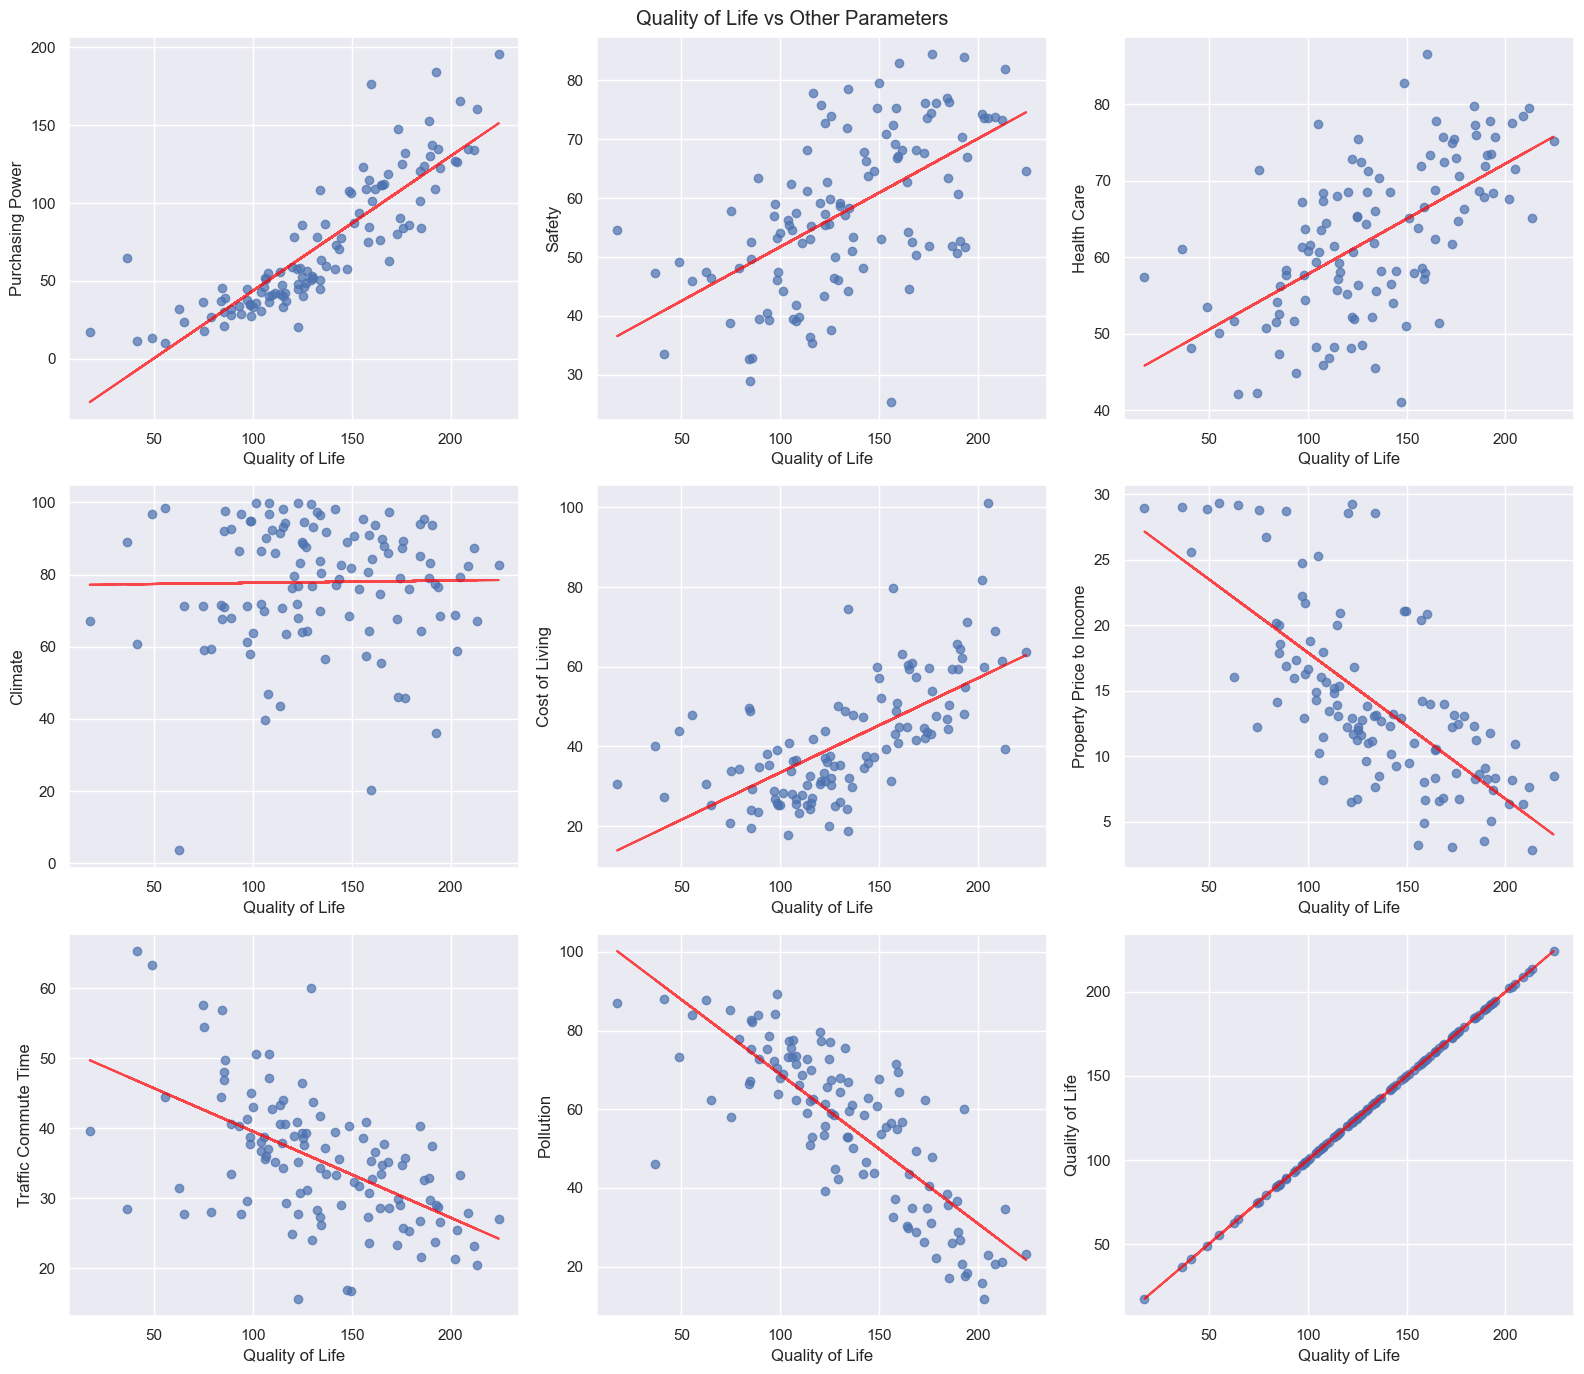

In [399]:
fig = plt.figure(figsize=(16,14))
fig.suptitle("Quality of Life vs Other Parameters")
n_col = 3
n_row = 3
for i, col in enumerate(df.select_dtypes(include='number').columns, 1):
    ax= fig.add_subplot(n_col, n_row, i)
    ax.scatter(x=df["Quality of Life"], y=df[col], alpha=0.7)
    ax.set_xlabel("Quality of Life")
    ax.set_ylabel(col)

    # Add trend lines
    x = df["Quality of Life"]
    y = df[col]
    
    # Perform a linear regression to plot an Ordinary Least Square line
    slope, intercept = np.polyfit(x, y, 1)  # Degree 1 for linear fit
    trend_line = slope * x + intercept  # Compute the line values
    ax.plot(x, trend_line, color='red', alpha=0.7, label="Trend Line")
    
fig.tight_layout()

## Correlation heatmap

In [622]:
corr = df.select_dtypes(include='number').corr()

upper_triangle = np.triu(corr)

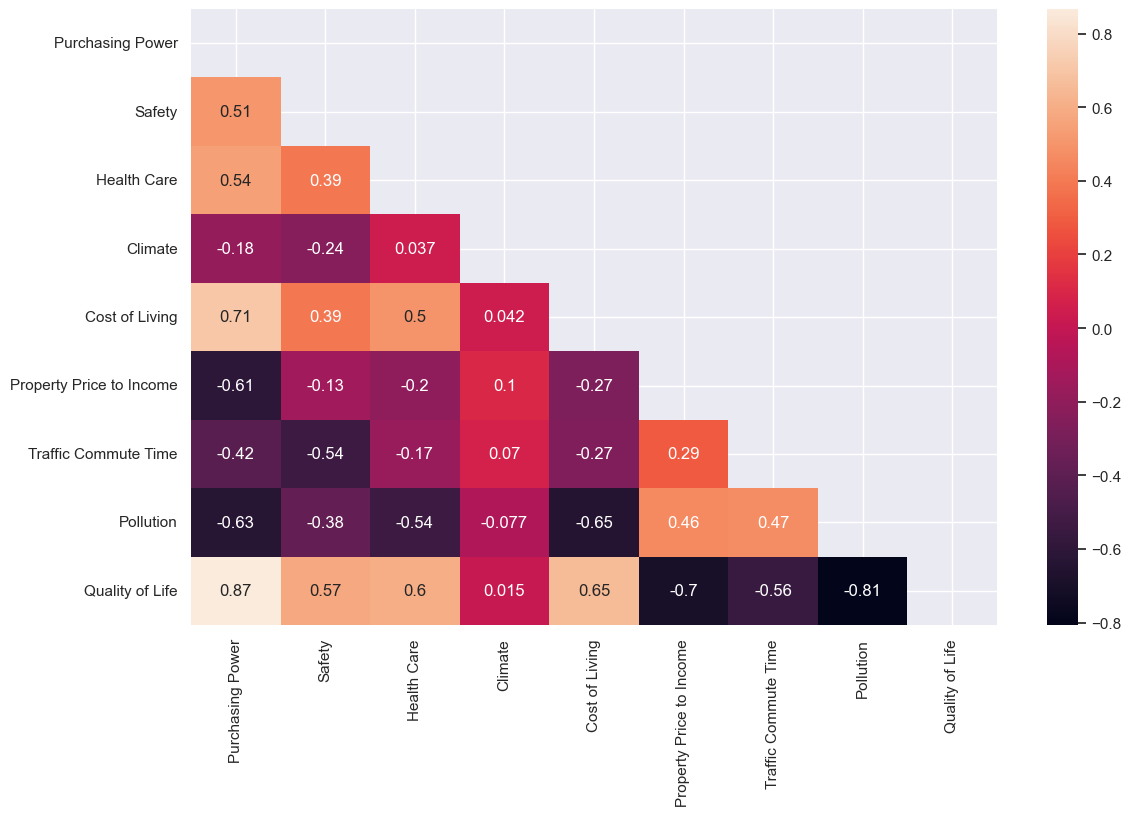

In [624]:
sns.heatmap(corr_matrix, annot=True, mask=upper_triangle);

## Pair Plots 

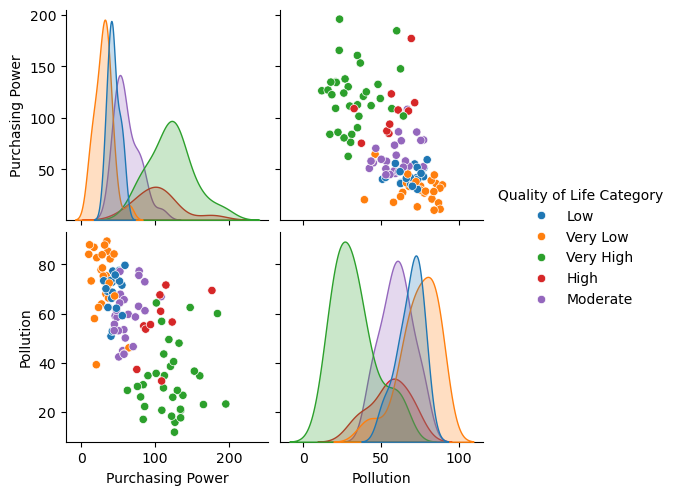

In [197]:
sns.pairplot(data=df[["Purchasing Power", "Pollution", "Quality of Life Category"]], hue="Quality of Life Category");

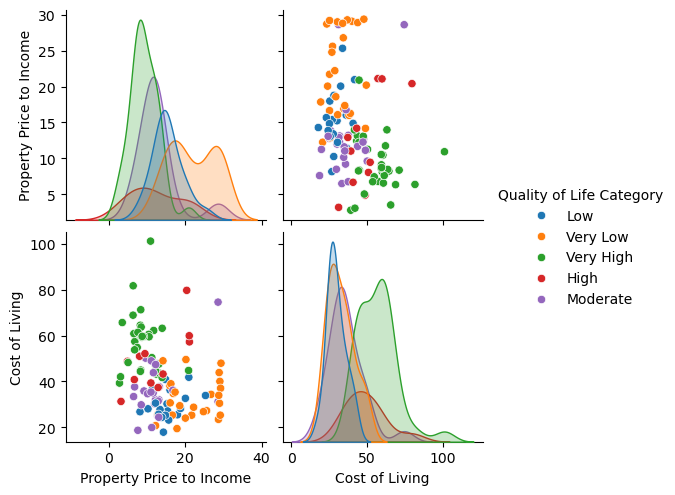

In [204]:
sns.pairplot(data=df[["Property Price to Income", "Cost of Living", "Quality of Life Category"]], hue="Quality of Life Category");

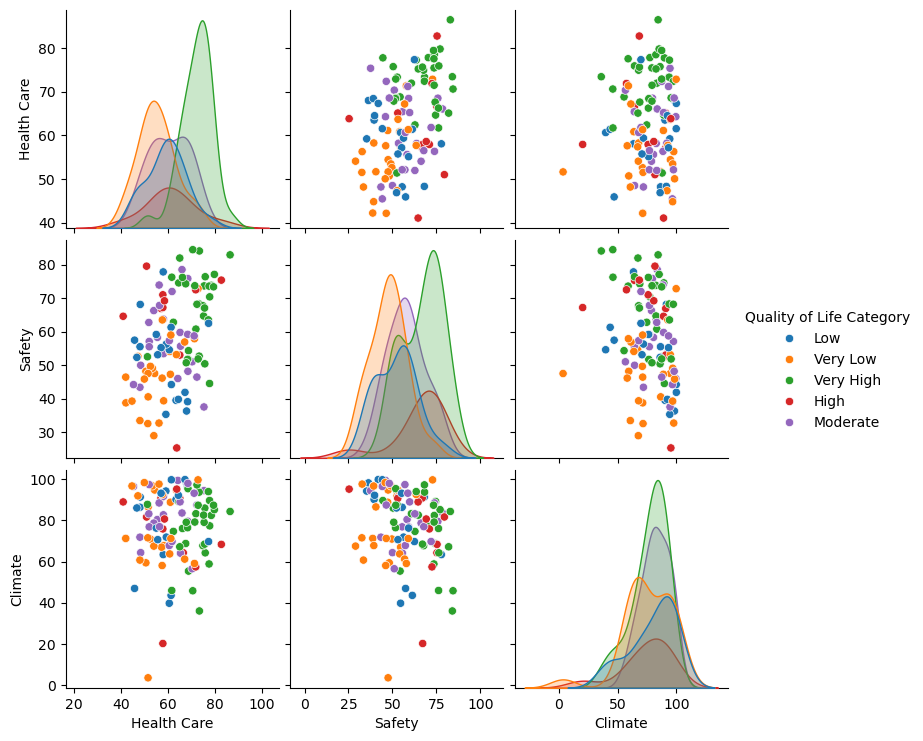

In [208]:
sns.pairplot(data=df[["Health Care", "Safety", "Climate", "Quality of Life Category"]], hue="Quality of Life Category");

### Interactive Choropleth

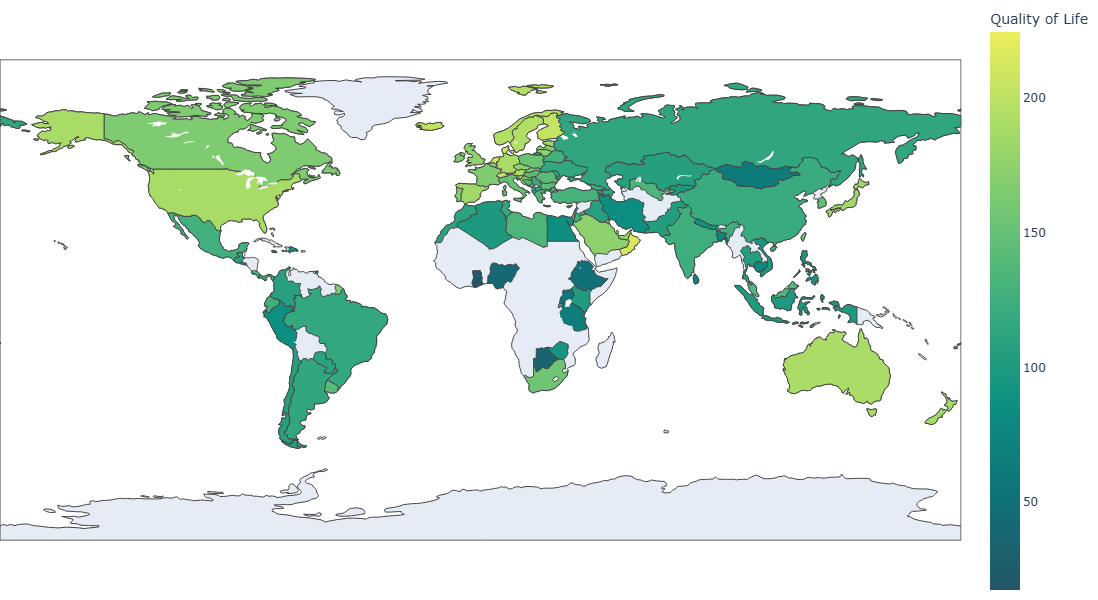

In [686]:
# create figure
fig = px.choropleth(locations=df['Country'],
                    locationmode="country names", 
                    color=df['Quality of Life'].to_list(), 
                    scope="world", 
                    color_continuous_scale="Aggrnyl",
                    labels={'color':'Quality of Life',
                           'locations':'Country'}
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                  width=1100,
                  height=600)
fig.show()

### Best vs Worst 10 Countries in terms of Life Quality

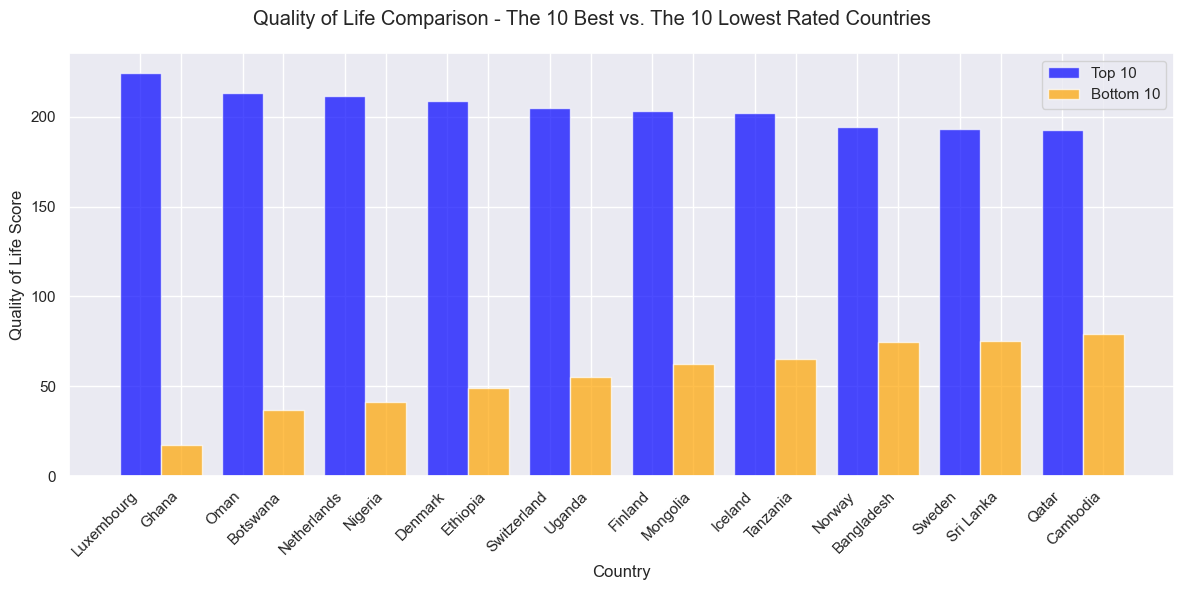

In [633]:
fig, ax = plt.subplots(figsize=(12, 6))

top10 = df[['Country', 'Quality of Life']].sort_values(by='Quality of Life', ascending=False).head(10)
bottom10 = df[['Country', 'Quality of Life']].sort_values(by='Quality of Life', ascending=True).head(10)

# Define bar width and positions
bar_width = 0.4
x_top = np.arange(len(top10))
x_bottom = np.arange(len(bottom10)) + bar_width  # Shifted for grouping

# Create grouped bar plot
ax.bar(x_top, top10["Quality of Life"], width=bar_width, label="Top 10", color="blue", alpha=0.7)  
ax.bar(x_bottom, bottom10["Quality of Life"], width=bar_width, label="Bottom 10", color="orange", alpha=0.7)

# Set x-axis labels
ax.set_xticks(np.concatenate([x_top, x_bottom]))  # Combine positions
ax.set_xticklabels(list(top10["Country"]) + list(bottom10["Country"]), rotation=45, ha="right")

# Add labels and legend
ax.set_xlabel("Country")
ax.set_ylabel("Quality of Life Score")
ax.legend()
fig.suptitle("Quality of Life Comparison - The 10 Best vs. The 10 Lowest Rated Countries")
plt.tight_layout()
plt.show()